## New Measure - Prescribing of toothpaste

##### Rationale
OpenPrescribing  currently has data on GP prescriptions and does not have information on dentists prescribing. Dentists are best placed to assess, prescribe and monitor dental problems and it is recommended that they should issue any prescriptions such as tootpastes for dental conditions. Additionally NHS England [recommends](https://www.england.nhs.uk/wp-content/uploads/2018/03/otc-guidance-for-ccgs.pdf) that there should be no routine prescribing for the treatment of dental caries. Therefore there should be limited if any prescribing of toothpastes in general practice.

Please note that this is an experimental measure. We would be grateful for any feedback at hello@ebmdatalab.net.


### Proposed measure


__Title__: Prescribing of toothpaste per 1000 patients

__Description__: Cost of toothpaste per 1000 patients 

__Why It Matters__: Dentists are best placed to assess, prescribe and monitor dental problems and it is recommended that they should issue any prescriptions such as tootpastes for dental conditions. Additionally NHS England [recommends](https://www.england.nhs.uk/wp-content/uploads/2018/03/otc-guidance-for-ccgs.pdf) that there should be no routine prescribing for the treatment of dental caries. Therefore there should be limited if any prescribing of toothpastes in general practice.



In [1]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps

In [2]:
sql = """
SELECT
  pct,
  month,
  bnf_name,
  rx.bnf_code,
  SUM(items) AS total_items,
  SUM(actual_cost) AS total_cost
FROM
  hscic.normalised_prescribing_standard AS rx
INNER JOIN (  SELECT DISTINCT bnf_code   FROM ebmdatalab.dmd.form_dose  WHERE  form_route = "paste.dental") AS dmd
ON
  rx.bnf_code = dmd.bnf_code
JOIN
  hscic.ccgs AS ccgs
ON
  rx.pct=ccgs.code
WHERE
  ccgs.org_type='CCG'
GROUP BY
  pct,
  month,
  bnf_code,
  bnf_name
"""
toothpaste_df = bq.cached_read(sql, csv_path='toothpast_df.csv', use_cache=True)
toothpaste_df['month'] = toothpaste_df['month'].astype('datetime64[ns]')
toothpaste_df.head()

,pct,month,bnf_name,bnf_code,total_items,total_cost
0,00J,2016-07-01,oraNurse_Toothpaste Orig (1450ppm),190205500BCNUA0,1,1.49
1,09G,2016-07-01,Colgate_TOTAL Advanced Toothpaste,190205500BCATA0,1,1.37
2,05A,2016-04-01,oraNurse_Toothpaste Orig (1450ppm),190205500BCNUA0,1,2.88
3,99C,2016-08-01,Colgate_TOTAL Pro Gum Health Tartar Cont,190205500BCNMA0,2,5.08
4,05A,2016-11-01,oraNurse_Toothpaste Orig (1450ppm),190205500BCNUA0,1,2.97


In [3]:
toothpaste_df.nunique()

pct              192
month            107
bnf_name          26
bnf_code          13
total_items      171
total_cost     32499
dtype: int64

In [4]:
toothpaste_df["bnf_name"].unique()

array(['oraNurse_Toothpaste Orig (1450ppm)      ',
       'Colgate_TOTAL Advanced Toothpaste       ',
       'Colgate_TOTAL Pro Gum Health Tartar Cont',
       'oraNurse_Toothpaste 4+ yrs (1450ppm)',
       'Colgate_TOTAL Pro Gum Health Toothpaste',
       'Colgate_TOTAL Pro Gum Health Toothpaste ',
       'Colgate_TOTAL Advanced Toothpaste',
       'oraNurse_Toothpaste 0-3 yrs (1000ppm)',
       'oraNurse_Toothpaste 4+ yrs (1450ppm)    ',
       'oraNurse_Toothpaste 0-3 yrs (1000ppm)   ',
       'Sensodyne_Gel Toothpaste                ',
       'Colgate TOTAL_Pro Gum Health Toothpaste ',
       'Sensodyne_Gel Toothpaste',
       'Colgate TOTAL_Pro Gum Health TartarCont ',
       'Sod Fluoride_Dental Paste 1.1% S/F',
       'oraNurse_Toothpaste Orig (1450ppm)',
       'Sod Fluoride_Dental Paste 0.619% S/F',
       'Duraphat_Fluoride Toothpaste (2800ppm)',
       'Duraphat_Fluoride Toothpaste (5000ppm)',
       'Biotene_Dry Mth A-Bact Toothpaste (Orig)',
       'Biotene_Dry Mth A-Bact 

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
totalcost = toothpaste_df.groupby(['month'])['total_cost'].sum()
totalcost

month
2010-08-01   26268.18
2010-09-01   28551.89
2010-10-01   28029.13
2010-11-01   30519.91
2010-12-01   32022.49
2011-01-01   29334.15
2011-02-01   28974.79
2011-03-01   34290.76
2011-04-01   31017.19
2011-05-01   34866.36
2011-06-01   36389.43
2011-07-01   35159.93
2011-08-01   36402.60
2011-09-01   38134.73
2011-10-01   36317.73
2011-11-01   39104.27
2011-12-01   40033.09
2012-01-01   39666.16
2012-02-01   39252.87
2012-03-01   42681.83
2012-04-01   40392.68
2012-05-01   46309.32
2012-06-01   42190.58
2012-07-01   45864.78
2012-08-01   44996.38
2012-09-01   42166.81
2012-10-01   46566.67
2012-11-01   48261.70
2012-12-01   47524.75
2013-01-01   50628.67
               ...   
2017-01-01   77498.85
2017-02-01   72609.49
2017-03-01   83265.50
2017-04-01   72192.90
2017-05-01   78769.62
2017-06-01   79950.12
2017-07-01   77105.11
2017-08-01   78055.86
2017-09-01   74884.10
2017-10-01   76427.77
2017-11-01   75880.96
2017-12-01   74578.73
2018-01-01   77676.32
2018-02-01   67527.62
2018

(0, 86115.36121199976)

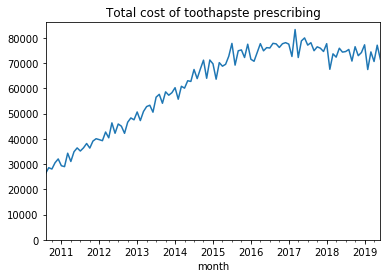

In [6]:
toothpaste_df.groupby("month")['total_cost'].sum().plot(kind='line', title="Total cost of toothapste prescribing")
plt.ylim(0, )

In [7]:
##get list size info
sql2 = """
SELECT month, 
pct_id AS pct,
AVG(total_list_size) AS list_size
FROM ebmdatalab.hscic.practice_statistics
group by 
month, pct
order by
month, pct,
list_size
"""
df_list = bq.cached_read(sql2, csv_path='df_list.csv')
df_list['month'] = df_list['month'].astype('datetime64[ns]')
df_list.head(5)

,month,pct,list_size
0,2014-07-01,NaN,0.00
1,2014-07-01,00C,7615.71
2,2014-07-01,00D,5654.82
3,2014-07-01,00F,5881.00
4,2014-07-01,00G,8014.55


In [8]:
ccg_total_toothpaste = toothpaste_df.groupby(["month", "pct"])["total_items","total_cost"].sum().reset_index()
ccg_total_toothpaste.head()

,month,pct,total_items,total_cost
0,2010-08-01,00C,7,34.31
1,2010-08-01,00D,31,174.04
2,2010-08-01,00J,24,179.28
3,2010-08-01,00K,5,21.51
4,2010-08-01,00L,26,107.18


In [9]:
#merge dataframes and cost / 10000

toothpaste_df_1000 = pd.merge(ccg_total_toothpaste, df_list, on=['month', 'pct'])
toothpaste_df_1000['cost_per_1000'] = 1000* (toothpaste_df_1000['total_cost']/toothpaste_df_1000['list_size'])
toothpaste_df_1000.head(5)

,month,pct,total_items,total_cost,list_size,cost_per_1000
0,2014-07-01,00C,21,139.70,7615.71,18.34
1,2014-07-01,00D,58,381.82,5654.82,67.52
2,2014-07-01,00J,65,447.30,6117.39,73.12
3,2014-07-01,00K,20,121.67,6346.76,19.17
4,2014-07-01,00L,58,360.10,6847.45,52.59


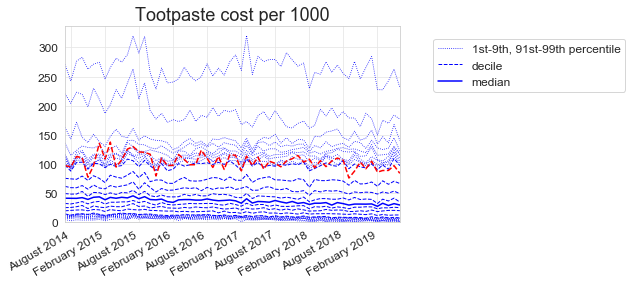

In [10]:
#create sample deciles

charts.deciles_chart(
        toothpaste_df_1000,
        period_column='month',
        column='cost_per_1000',
        title="Tootpaste cost per 1000",
        show_outer_percentiles=True)

#add in example CCG (Tower Hamlets)
df_subject = toothpaste_df_1000.loc[toothpaste_df_1000['pct'] == '08V']
plt.plot(df_subject['month'], df_subject['cost_per_1000'], 'r--')

plt.show()

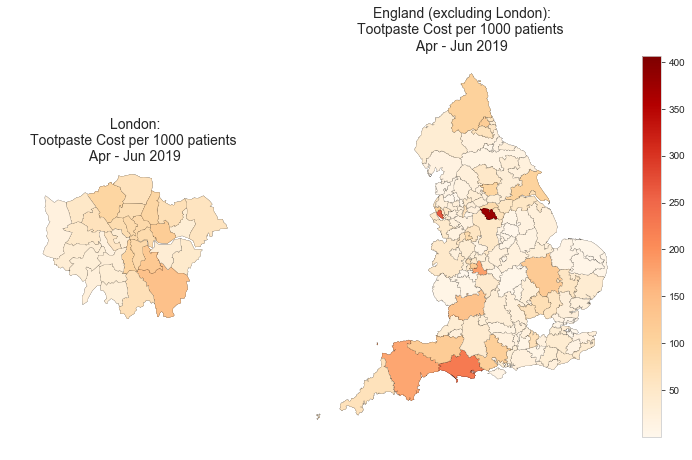

In [11]:
#create choropeth map of cost per 1000 patients
plt.figure(figsize=(12, 7))
latest_toothpaste_df_1000 = toothpaste_df_1000.loc[(toothpaste_df_1000['month'] >= '2019-04-01') & (toothpaste_df_1000['month'] <= '2019-06-01')]
plt = maps.ccg_map(latest_toothpaste_df_1000, title="Tootpaste Cost per 1000 patients \n Apr - Jun 2019 ", column='cost_per_1000', separate_london=True)
plt.show()